In [59]:
import pandas as pd
import seaborn as sns

In [124]:
rename_columns = {
    "porto_alegre": "Porto Alegre", 
    "brasilia": "Brasília", 
    "maraba": "Marabá", 
    "juazeiro_do_norte": "Juazeiro do Norte",
    "recife": "Recife", 
    "belo_horizonte": "Belo Horizonte"
}

df = pd.read_csv("results.csv").rename(columns=rename_columns)

In [118]:
test_columns = ["Porto Alegre", "Brasília", "Marabá", "Juazeiro do Norte", "Recife", "Belo Horizonte"]

# Function to get the name of the column with "Teste" for each row
def get_test_column(row):
    for col in test_columns:
        if row[col] == 'Teste':
            return col
    return None  # If no column has "Teste" in the row

def get_new_type(row):
    if row["type"] == "xgb_split3_2":
        return "Split 3/2"
    elif row["type"] == "xgb_split4_1":
        return "Split 4/1"
    else:
        return "Ensemble"

# Create a new column with the name of the column containing "Teste"
df["Hub"] = df.apply(get_test_column, axis=1)
df["Type"] = df.apply(get_new_type, axis=1)

In [119]:
df = df.drop(columns=["Unnamed: 0", "type", "acc", "recall", "precision"])

In [120]:
df = df.drop(columns=test_columns)

In [121]:
df = df.rename(columns={"auc_score": "ROC AUC Score", "f1_score": "F1 Score"})

In [122]:
df

,ROC AUC Score,F1 Score,Hub,Type
0,0.817342,0.342832,Porto Alegre,Split 3/2
1,0.795590,0.306281,Porto Alegre,Split 3/2
2,0.821250,0.289897,Porto Alegre,Split 3/2
3,0.788255,0.317912,Porto Alegre,Split 3/2
4,0.835430,0.345511,Porto Alegre,Split 3/2
...,...,...,...,...
91,0.599624,0.436946,Marabá,Ensemble
92,0.766492,0.299403,Brasília,Ensemble
93,0.546829,0.346650,Juazeiro do Norte,Ensemble
94,0.785826,0.426209,Recife,Ensemble


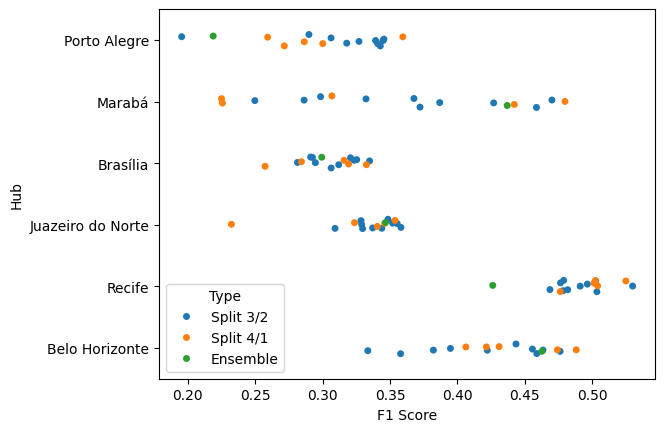

In [123]:
ax = sns.stripplot(x="F1 Score", y="Hub", hue="Type", data=df)

In [98]:
df = df[df['type'] != 'ensemble']
# df = df[df['type'] != 'xgb_split3_2']

result_list = []
hubs = ["Porto Alegre", "Brasília", "Marabá", "Juazeiro do Norte", "Recife", "Belo Horizonte"]

for hub in hubs:
    # Filtering rows where 'Teste' is the hub
    teste_rows = df[df[hub] == 'Teste']
    
    # Calculating the mean AUC for 'Teste' rows
    mean_auc = teste_rows['auc_score'].mean()
    
    # Appending the results to the new DataFrame
    result_list.append({'Hub': hub, 'Mean AUC Hub': mean_auc})


mean_auc_df = pd.DataFrame(result_list) 

In [111]:
for hub1 in hubs:
    # Iterating through each "Treino" hub for the current "Teste" hub
    for hub2 in hubs:
        # Filtering rows where 'Teste' is the hub
        teste_rows = df[df[hub1] == 'Teste']
        
        # Filtering rows where 'Treino' is the hub
        treino_rows = teste_rows[teste_rows[hub2] == 'Treino']
        
        # Calculating the mean AUC for 'Treino' rows
        mean_auc = treino_rows['auc_score'].mean()
        
        # Appending the results to the list
        result_list.append({'Hub': hub1, 'Treino': hub2, 'Mean AUC': mean_auc})

# Creating a DataFrame from the list of results
train_hub_df = pd.DataFrame(result_list)

In [112]:
final_df.columns

Index(['Hub', 'Treino', 'Mean AUC Score Difference'], dtype='object')

In [113]:
final_df = train_hub_df.merge(mean_auc_df, on="Hub", how="left").drop(columns=["Mean AUC Hub_x"]).rename(columns={"Mean AUC Hub_y": "Mean AUC Hub"}).dropna()
final_df["Mean AUC Score Difference"] = final_df["Mean AUC"] - final_df["Mean AUC Hub"]
final_df = final_df.drop(columns=["Mean AUC", "Mean AUC Hub"])

In [114]:
final_df

,Hub,Treino,Mean AUC Score Difference
7,Porto Alegre,Brasília,-0.003509
8,Porto Alegre,Marabá,0.000368
9,Porto Alegre,Juazeiro do Norte,-0.002789
10,Porto Alegre,Recife,0.007265
11,Porto Alegre,Belo Horizonte,-0.001651
12,Brasília,Porto Alegre,0.001085
14,Brasília,Marabá,0.001858
15,Brasília,Juazeiro do Norte,-0.001543
16,Brasília,Recife,0.000263
17,Brasília,Belo Horizonte,-0.000619


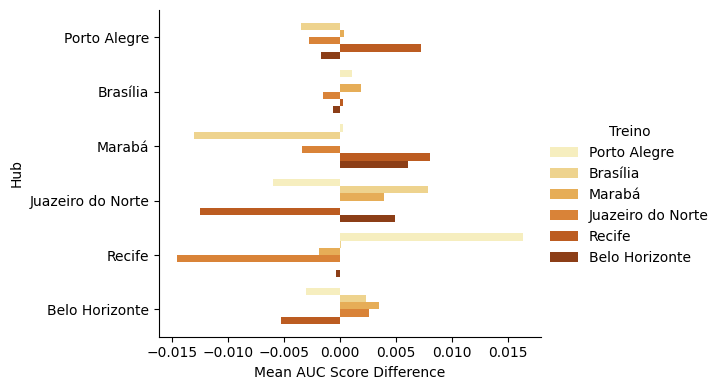

In [125]:
sns.color_palette("rocket")
ax = sns.catplot(x="Mean AUC Score Difference", y="Hub", hue="Treino", hue_order=hubs,data=final_df, palette="YlOrBr", kind="bar", legend_out=True, height=4, aspect=1.5)